### Accuracy

#### Regression Tree

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

# Load Boston data
data = load_boston()

# Split into test/train
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, 
                                                    test_size=.33,
                                                    random_state=0)

# Parameter Search                                                    
model = DecisionTreeRegressor()
depth_parm = np.linspace(1,12,12)
num_samples_parm = np.linspace(5,100,20)
parameters = {'max_depth' : depth_parm,
             'min_samples_leaf' : num_samples_parm}
regressor = GridSearchCV(model, parameters, scoring = 'mean_squared_error', cv=10)
regressor.fit(X_train,y_train)

                                                    
# Test Prediction
pred = regressor.predict(X_test)
mse = np.mean((y_test - pred)**2)
print mse


22.3286112218


#### Random Forest

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split

# Load Boston data
data = load_boston()

# Split into test/train
X_train, X_test, y_train, y_test = train_test_split(data.data, 
                                                    data.target, 
                                                    test_size=.33,
                                                    random_state=0)

# Train and fit model                                                   
rf = RandomForestRegressor(n_estimators=1000,
                                  max_features='auto',
                                  oob_score=True,
                                  random_state=0)
rf.fit(X_train,y_train)

                                                    
# Test Prediction
pred = rf.predict(X_test)
mse = np.mean((y_test - pred)**2)
mse

13.89879735479048

37% reduction in MSE

### Random Forest Interpretation

#### Mean Decrease Impurity

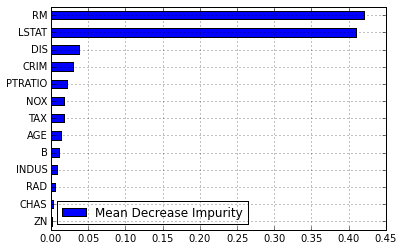

In [6]:
import numpy as np
import pandas as pd

# Plot the feature importance
feat_scores = pd.DataFrame({'Mean Decrease Impurity' : rf.feature_importances_},
                           index=data.feature_names)
feat_scores = feat_scores.sort('Mean Decrease Impurity')
feat_scores.plot(kind='barh')

#### Mean Decrease Accuracy

In [12]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict

 
boston = load_boston()   
names = boston.feature_names
X = boston["data"]
Y = boston["target"]
 

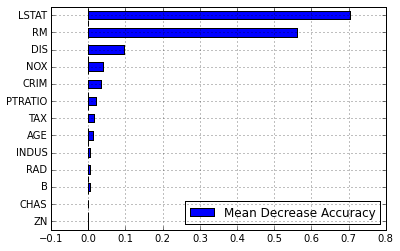

In [7]:
rf = RandomForestRegressor()
scores = defaultdict(list)
 
# crossvalidate the scores on a number of 
# different random splits of the data
for train_idx, test_idx in ShuffleSplit(len(X), 100, .3):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    r = rf.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)

score_series = pd.DataFrame(scores).mean()
scores = pd.DataFrame({'Mean Decrease Accuracy' : score_series})
scores.sort('Mean Decrease Accuracy').plot(kind='barh')

##Visualizing the data

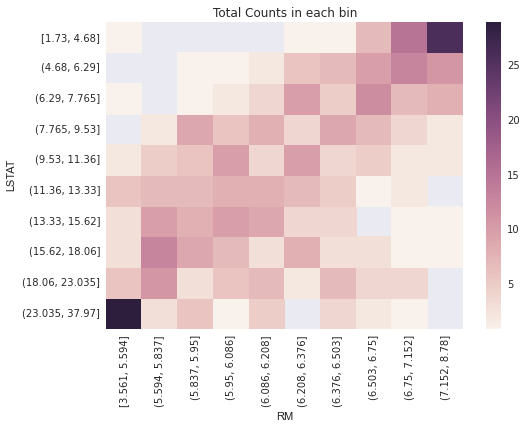

In [37]:
import seaborn

df = pd.DataFrame(X, columns = names)
targ = pd.Series(Y, name='Price')
lstat_disc = pd.qcut(df.LSTAT,10,retbins=False)

rm_disc = pd.qcut(df.RM, 10)
pre_agg = pd.DataFrame({'LSTAT' : lstat_disc,
                        'RM' : rm_disc,
                        'Price' : Y})

# Total Counts
agg = pre_agg.groupby(['LSTAT','RM']).apply(len)
idx = np.roll(range(10),1)
seaborn.heatmap(agg.ix[lstat_disc.cat.categories].unstack().ix[:,idx])
plt.title('Total Counts in each bin')

In [44]:
pd.cut(df.LSTAT, np.arange(10))

0     (4, 5]
1        NaN
2     (4, 5]
3     (2, 3]
4     (5, 6]
5     (5, 6]
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13    (8, 9]
14       NaN
...
491       NaN
492       NaN
493       NaN
494       NaN
495       NaN
496       NaN
497       NaN
498       NaN
499       NaN
500       NaN
501       NaN
502       NaN
503    (5, 6]
504    (6, 7]
505    (7, 8]
Name: LSTAT, Length: 506, dtype: category
Categories (9, object): [(0, 1] < (1, 2] < (2, 3] < (3, 4] ... (5, 6] < (6, 7] < (7, 8] < (8, 9]]

In [40]:
lstat_disc = pd.qcut(df.LSTAT,10,retbins=False)

In [41]:
agg.ix[lstat_disc.cat.categories].unstack()

RM,"(5.594, 5.837]","(5.837, 5.95]","(5.95, 6.086]","(6.086, 6.208]","(6.208, 6.376]","(6.376, 6.503]","(6.503, 6.75]","(6.75, 7.152]","(7.152, 8.78]","[3.561, 5.594]"
LSTAT,,,,,,,,,,
"[1.73, 4.68]",NaN,NaN,NaN,NaN,1,1,7,15,26,1
"(4.68, 6.29]",NaN,1,1,2,6,7,10,13,11,NaN
"(6.29, 7.765]",NaN,1,2,4,10,5,12,7,8,1
"(7.765, 9.53]",2,9,6,8,4,9,7,4,2,NaN
"(9.53, 11.36]",5,6,10,4,10,4,5,2,2,2
"(11.36, 13.33]",7,7,8,8,7,5,1,2,NaN,6
"(13.33, 15.62]",10,8,10,9,4,4,NaN,1,1,3
"(15.62, 18.06]",13,9,7,3,8,3,3,1,1,3
"(18.06, 23.035]",11,3,6,7,2,7,4,4,NaN,6


In [32]:
idx

array([9, 0, 1, 2, 3, 4, 5, 6, 7, 8])

In [42]:
type(agg.ix[lstat_disc.cat.categories].unstack().ix[:,idx])

pandas.core.frame.DataFrame

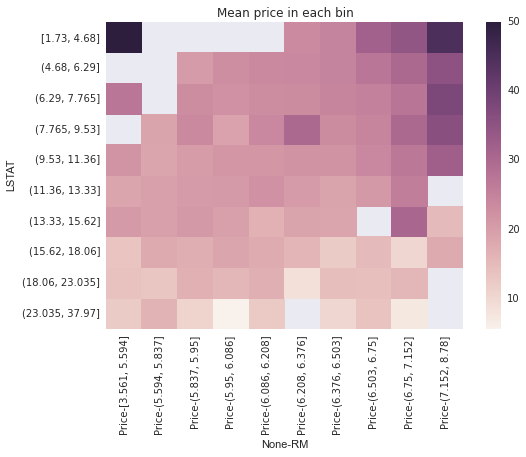

In [11]:
# Price
agg = pre_agg.groupby(['LSTAT','RM']).mean()
idx = np.roll(range(10),1)
seaborn.heatmap(agg.ix[lstat_disc.cat.categories].unstack().ix[:,idx])
plt.title('Mean price in each bin')